In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

std_sc = StandardScaler()

x = pd.read_csv('X_close_v4.2.csv')
y = pd.read_csv('Y_close_v4.2.csv')

def preprocess(X, Y, scaler):

    X_scaled_array = scaler.fit_transform(X.loc[:, ['Close', 'ForwardCloudWidth', 'PriceBaseLineDistance', 'PriceConvLineDistance']])
    X_unscaled = X.drop(['Close', 'ForwardCloudWidth', 'PriceBaseLineDistance', 'PriceConvLineDistance'], axis=1)

    X_scaled = pd.DataFrame(X_scaled_array, columns = ['Close', 'ForwardCloudWidth', 'PriceBaseLineDistance', 'PriceConvLineDistance'], index = X.index)

    X = pd.concat([X_unscaled, X_scaled], axis= 1)
    X = X.values

    Y = Y.values

    return X, Y

x_, y_ = preprocess(x,y,std_sc)

In [3]:
from myCombinedLSTMClassifier import My_Combined_LSTM_Classifier
# old model best accuracy:
# accuracy  test_num  epoch  time_steps  units  dropout  hidden_layer_num  model_activation  batch_size
# 49.0      200       30      14         60     0.5      7                 relu              32


my_model_object = My_Combined_LSTM_Classifier(
    x = x_,
    y = y_,
    test_num = 200,
    time_steps = 60,
    epoch=30,
    hidden_layer_num=7,
    model_activation= 'relu',
    batch_size=32,
    units=50,
    dropout=0.33,
    fit_verbose = 1
)

Epoch 1/30
46/46 [==============================] - 44s 325ms/step - loss: 1.0909 - accuracy: 0.3629
Epoch 2/30
46/46 [==============================] - 15s 332ms/step - loss: 1.0933 - accuracy: 0.3773
Epoch 3/30
46/46 [==============================] - 15s 333ms/step - loss: 1.0840 - accuracy: 0.3739
Epoch 4/30
46/46 [==============================] - 15s 332ms/step - loss: 1.0826 - accuracy: 0.3828
Epoch 5/30
46/46 [==============================] - 15s 334ms/step - loss: 1.0789 - accuracy: 0.3890
Epoch 6/30
46/46 [==============================] - 15s 326ms/step - loss: 1.0900 - accuracy: 0.3821
Epoch 7/30
46/46 [==============================] - 15s 324ms/step - loss: 1.0848 - accuracy: 0.3863
Epoch 8/30
46/46 [==============================] - 15s 333ms/step - loss: 1.0769 - accuracy: 0.3787
Epoch 9/30
46/46 [==============================] - 15s 324ms/step - loss: 1.0734 - accuracy: 0.3814
Epoch 10/30
46/46 [==============================] - 15s 324ms/step - loss: 1.0763 - accura

KeyboardInterrupt: 

----

### v4.2 old model 

**Example Initialize**

In [3]:
from myCombinedLSTMClassifier import My_Combined_LSTM_Classifier

my_model_object = My_Combined_LSTM_Classifier(
    x = x_,
    y = y_,
    test_num = 200,
    time_steps = 30,
    epoch=1,
    hidden_layer_num=3,
    model_activation= 'tanh',
    batch_size=32,
    units=10,
    fit_verbose = 0
)

**Model Tune**

In [5]:
my_model_object.model_tune(
    test_num = [200], 
    epoch = [30,60], 
    time_steps = [14, 28], 
    units = [30,60], 
    dropout = [0.1, 0.25, 0.5], 
    hidden_layer_num = [3,5,7], 
    model_activation = ['relu'], 
    batch_size = [32,64]
)

THE MODEL IS TUNING!
SEE U AN ETERNITY LATER *_*

Tune Step: 1/144 is done! It took 1 min 18 sec
Tune Step: 2/144 is done! It took 52.6 sec
Tune Step: 3/144 is done! It took 1 min 44 sec
Tune Step: 4/144 is done! It took 1 min 18 sec
Tune Step: 5/144 is done! It took 2 min 23 sec
Tune Step: 6/144 is done! It took 1 min 39 sec
Tune Step: 7/144 is done! It took 1 min 14 sec
Tune Step: 8/144 is done! It took 51.4 sec
Tune Step: 9/144 is done! It took 1 min 26 sec
Tune Step: 10/144 is done! It took 56.5 sec
Tune Step: 11/144 is done! It took 2 min 16 sec
Tune Step: 12/144 is done! It took 1 min 50 sec
Tune Step: 13/144 is done! It took 1 min 15 sec
Tune Step: 14/144 is done! It took 55.6 sec
Tune Step: 15/144 is done! It took 1 min 51 sec
Tune Step: 16/144 is done! It took 1 min 10 sec
Tune Step: 17/144 is done! It took 2 min 10 sec
Tune Step: 18/144 is done! It took 1 min 30 sec
Tune Step: 19/144 is done! It took 1 min 39 sec
Tune Step: 20/144 is done! It took 1 min 22 sec
Tune Step: 21/1

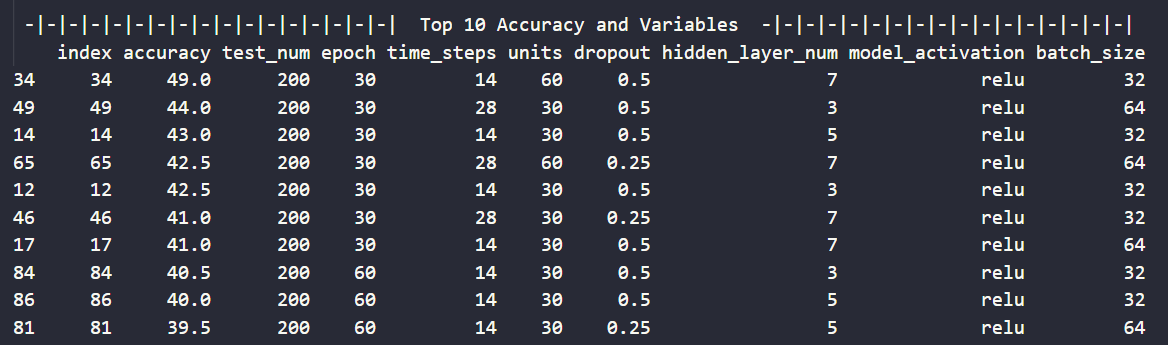

In [6]:
btc_data = pd.read_csv('BTC_data_preprocessed.csv')
btc_data

,Date,Close,Open,High,Low,Vol,Change
0,2018-09-13,6482.9,6338.0,6867.3,6337.8,3530000.0,2.29
1,2018-09-14,6483.7,6482.9,6579.4,6412.1,3200000.0,0.01
2,2018-09-15,6519.0,6482.6,6562.9,6470.3,3160000.0,0.54
3,2018-09-16,6500.2,6519.0,6520.8,6406.2,3340000.0,-0.29
4,2018-09-17,6251.9,6500.2,6533.5,6215.9,3260000.0,-3.82
...,...,...,...,...,...,...,...
1795,2023-08-13,29300.1,29428.2,29468.5,29272.3,13490.0,-0.44
1796,2023-08-14,29426.7,29300.1,29689.0,29116.0,39300.0,0.43
1797,2023-08-15,29195.3,29426.7,29472.0,29118.6,33810.0,-0.79
1798,2023-08-16,28726.3,29195.3,29251.1,28717.6,43710.0,-1.61


In [9]:
x_.shape

(1721, 16)